### Ch14 Figure3

In [1]:
# While looking at the data the analyst sees something interesting. There's a slight dip in sales on Sundays over the last few weeks.

data = []
shoes_type = ['lightweight trainer', 'cross-trainer', 'trail']

for i in range(len(shoes_type)):
    
    for j in range(1,8):    
        sales = 1000
        if j == 1:
            if rd.random() <= .8:
                sales = sales * rd.random()
        else:
            sales *= (1+rd.random())
        data.append([shoes_type[i], j, sales])
    
df = pd.DataFrame(data, columns=['shoes_type', 'day of week', 'sales'])
# df.to_csv('csv_output/ch14_fig3.csv', index=False)
df = pd.read_csv('csv_output/ch14_fig3.csv')
df.head()

,shoes_type,day of week,sales
0,lightweight trainer,1,1000.000000
1,lightweight trainer,2,1619.446985
2,lightweight trainer,3,1352.226900
3,lightweight trainer,4,1743.679298
4,lightweight trainer,5,1808.444459


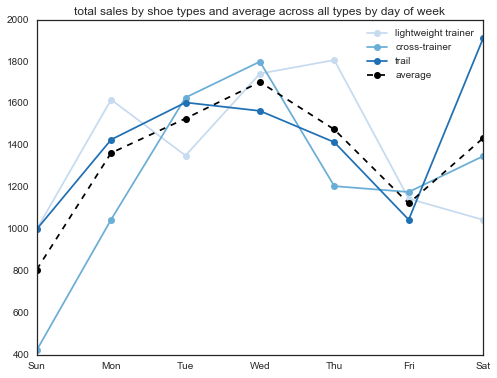

In [2]:
df = pd.read_csv('csv_output/ch14_fig3.csv')
shoes_type = ['lightweight trainer', 'cross-trainer', 'trail']

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(1,1, figsize=(8,6))
cm = sns.color_palette("Blues", 3)
mean = df.groupby('day of week').sales.mean()

x = 0
for i in shoes_type:
    ax.plot(df[df['shoes_type']==i]['day of week'], df[df['shoes_type']==i].sales, 'o-', color=cm[x])
    x+=1

ax.plot(np.arange(1,8), mean, 'o--', color='black');
leg = shoes_type
leg.append('average')
ax.legend(leg);
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat']);
ax.set_title('total sales by shoe types and average across all types by day of week');

f.savefig('svg_output/ch14_fig3.svg', format='svg')

Averagely, all types has slight decline in total sales dollars on Sunday, but different types peak on different day of the week.